In [1]:
from tensorflow.keras.datasets import cifar10
import pandas as pandas
import numpy as np
import warnings as warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import visualkeras

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [3]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3),
 (50000, 1),
 (5000, 32, 32, 3),
 (5000, 1),
 (5000, 32, 32, 3),
 (5000, 1))

In [4]:
X_train_conv = X_train/255
X_val_conv = X_val/255
X_test_conv = X_test/255

y_train_conv = to_categorical(y_train)
y_val_conv = to_categorical(y_val)
y_test_conv = to_categorical(y_test)

X_train_conv.shape, X_val.shape, X_test_conv.shape, y_train_conv.shape, y_val.shape, y_test_conv.shape

((50000, 32, 32, 3),
 (5000, 32, 32, 3),
 (5000, 32, 32, 3),
 (50000, 10),
 (5000, 1),
 (5000, 10))

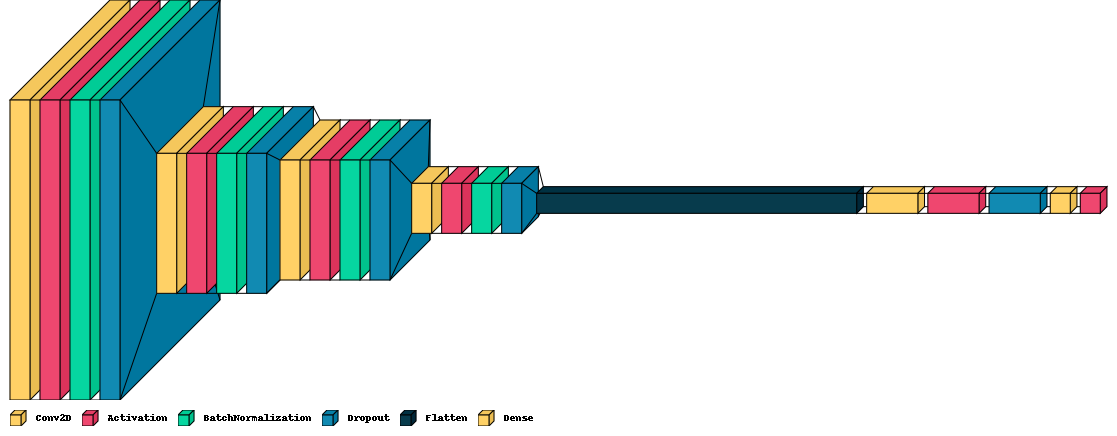

In [5]:
cnn = keras.Sequential()
cnn.add(Conv2D(128, (3, 3), padding='valid', input_shape=X_train_conv.shape[1:]))
cnn.add(Activation('relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, (3, 3), padding='valid', strides=(2,2)))
cnn.add(Activation('relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, (3, 3), padding='valid'))
cnn.add(Activation('relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, (3, 3), padding='valid', strides=(2,2)))
cnn.add(Activation('relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(512, kernel_regularizer=keras.regularizers.l2(0.030)))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10))
cnn.add(Activation('softmax'))

visualkeras.layered_view(cnn, scale_xy=10, legend=True)

In [6]:
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 activation (Activation)     (None, 30, 30, 128)       0         
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30, 30, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 activation_1 (Activation)   (None, 14, 14, 128)       0         
                                                        

                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 128)      512       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 128)         147584    
                                                                 
 activation_3 (Activation)   (None, 5, 5, 128)         0         
                                                                 
 batch_normalization_3 (Batc  (None, 5, 5, 128)        512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 128)         0         
                                                                 
 flatten (

In [7]:
cnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss=keras.losses.CategoricalCrossentropy(from_logits=True),
            metrics=keras.metrics.CategoricalAccuracy())

history = cnn.fit(X_train_conv, y_train_conv,
 epochs=50, batch_size=64, validation_data=(X_val_conv, y_val_conv), shuffle=True)

Epoch 1/50
782/782 [==============================] - 260s 328ms/step - loss: 5.1359 - categorical_accuracy: 0.4335 - val_loss: 2.3280 - val_categorical_accuracy: 0.5220
Epoch 2/50
782/782 [==============================] - 243s 310ms/step - loss: 2.1889 - categorical_accuracy: 0.5696 - val_loss: 2.3820 - val_categorical_accuracy: 0.4988
Epoch 3/50
782/782 [==============================] - 224s 287ms/step - loss: 2.1023 - categorical_accuracy: 0.6164 - val_loss: 2.0931 - val_categorical_accuracy: 0.6212
Epoch 4/50
782/782 [==============================] - 220s 281ms/step - loss: 2.0851 - categorical_accuracy: 0.6425 - val_loss: 2.2559 - val_categorical_accuracy: 0.6014
Epoch 5/50
782/782 [==============================] - 221s 283ms/step - loss: 2.0715 - categorical_accuracy: 0.6651 - val_loss: 2.0992 - val_categorical_accuracy: 0.6602
Epoch 6/50
782/782 [==============================] - 249s 318ms/step - loss: 2.0453 - categorical_accuracy: 0.6808 - val_loss: 2.0780 - val_categoric

157/157 [==============================] - 5s 29ms/step - loss: 1.4626 - categorical_accuracy: 0.8144


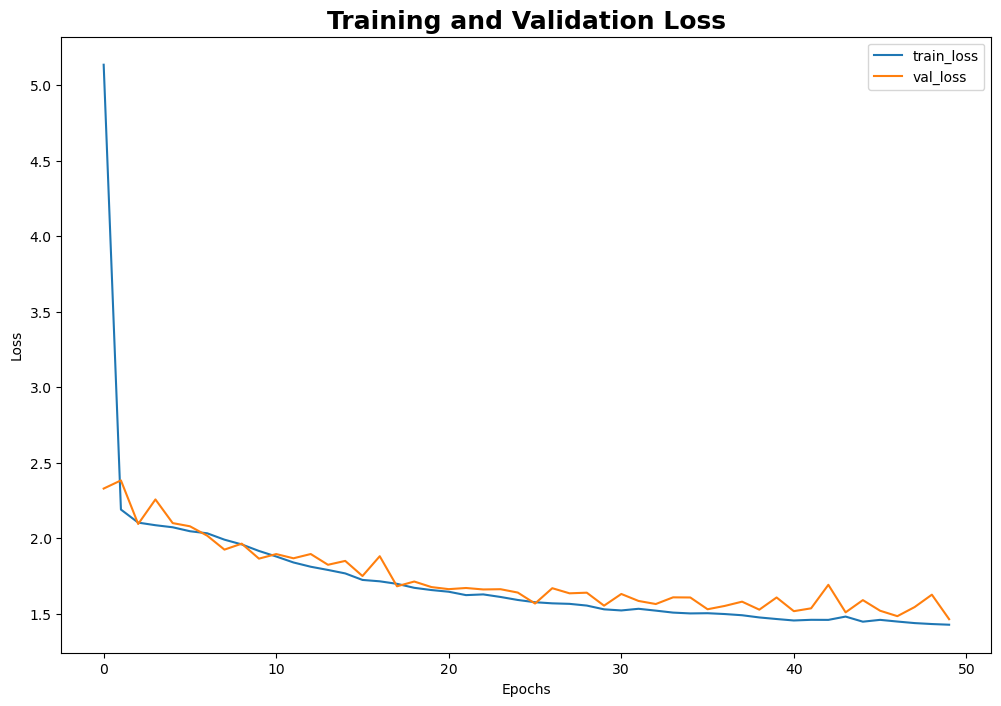

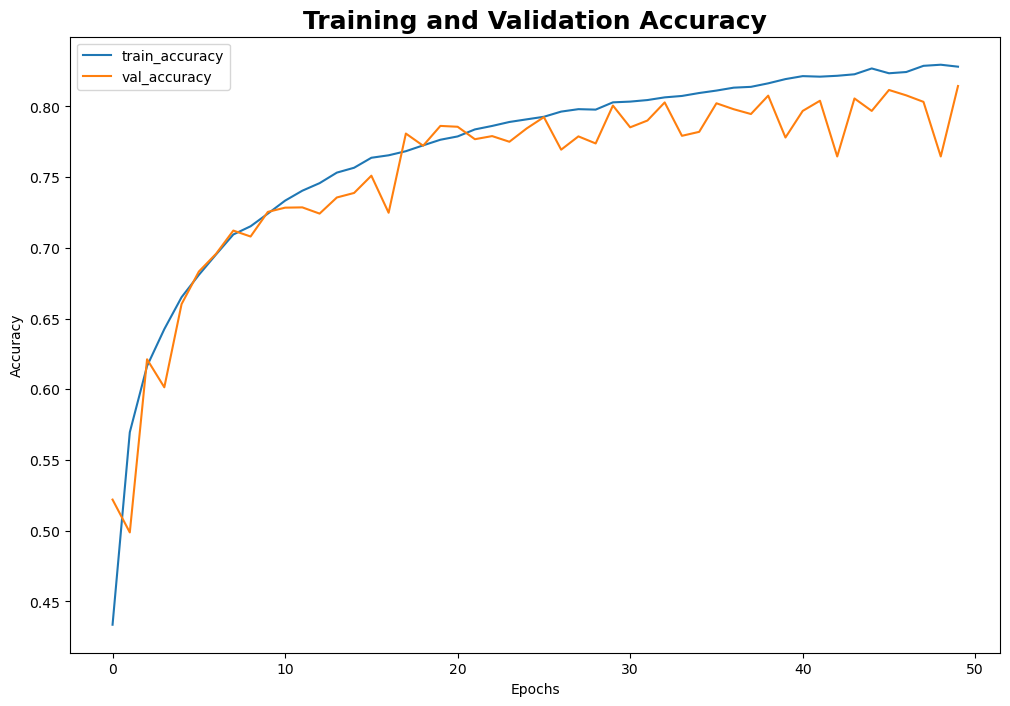

In [8]:
# evaluate the model
cnn.evaluate(X_val_conv, y_val_conv)

# Plot the training loss and validation loss
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss', fontsize=18, fontweight='bold')
plt.show()

# Plot the training accuracy and validation accuracy
plt.figure(figsize=(12, 8))
plt.plot(history.history['categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy', fontsize=18, fontweight='bold')
plt.show()

157/157 [==============================] - 5s 31ms/step


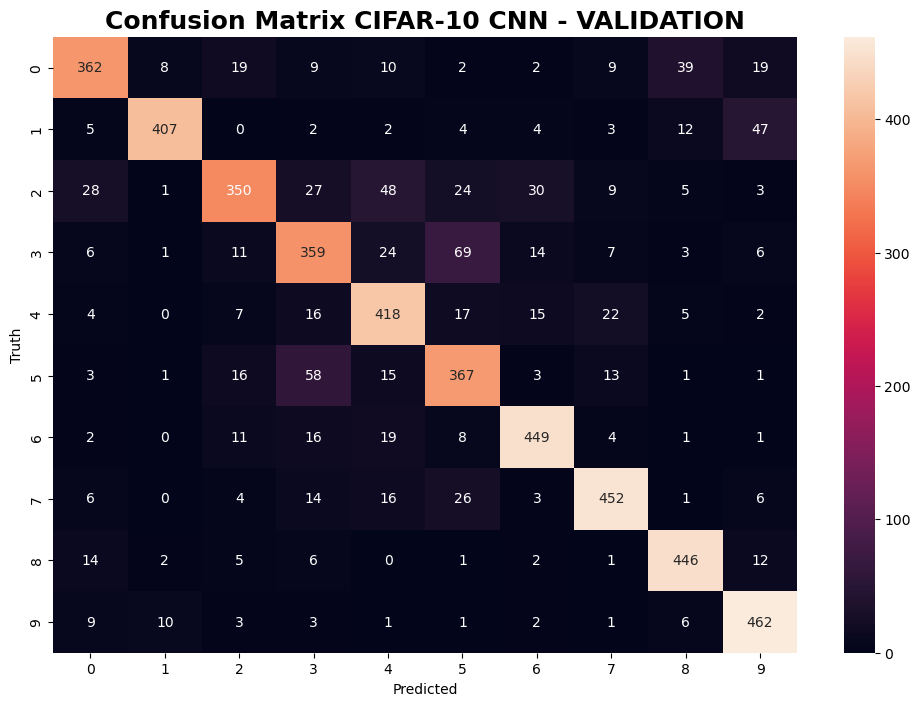

              precision    recall  f1-score   support

           0     0.8246    0.7557    0.7887       479
           1     0.9465    0.8374    0.8886       486
           2     0.8216    0.6667    0.7361       525
           3     0.7039    0.7180    0.7109       500
           4     0.7559    0.8261    0.7894       506
           5     0.7071    0.7678    0.7362       478
           6     0.8569    0.8787    0.8676       511
           7     0.8676    0.8561    0.8618       528
           8     0.8593    0.9121    0.8849       489
           9     0.8265    0.9277    0.8742       498

    accuracy                         0.8144      5000
   macro avg     0.8170    0.8146    0.8138      5000
weighted avg     0.8173    0.8144    0.8139      5000



In [10]:
y_pred = cnn.predict(X_val_conv)

predictions = []
for instance in y_pred:
    predictions.append(np.argmax(instance))

predictions = np.array(predictions)

cm = confusion_matrix(y_val, predictions)
plt.figure(figsize=(12, 8))

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix CIFAR-10 CNN - VALIDATION', fontsize=18, fontweight='bold')
plt.show()


print(classification_report(y_val, predictions, digits=4))

157/157 [==============================] - 5s 31ms/step


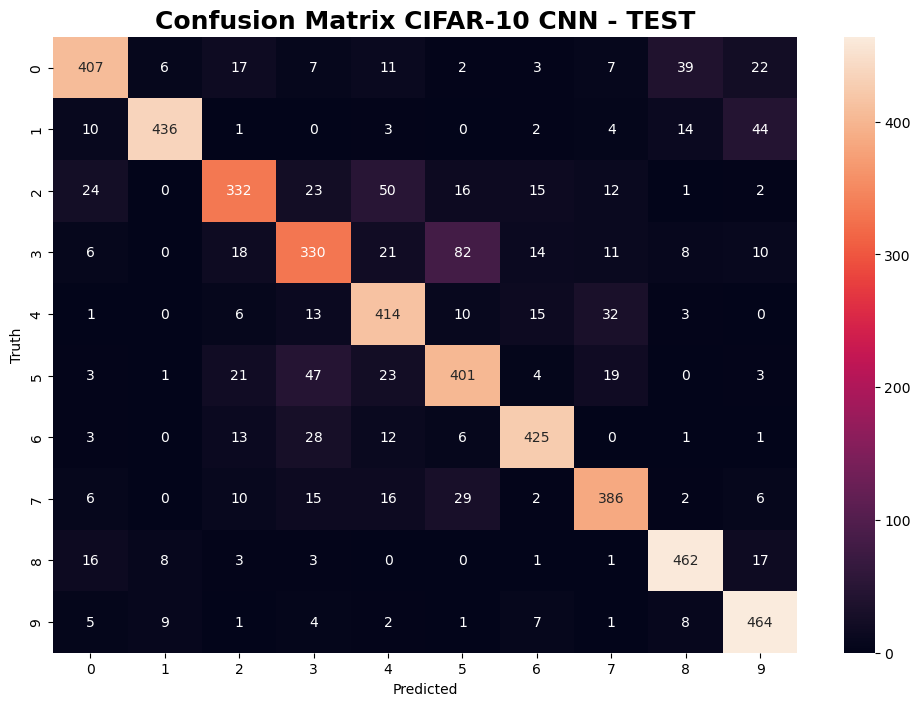

              precision    recall  f1-score   support

           0     0.8462    0.7812    0.8124       521
           1     0.9478    0.8482    0.8953       514
           2     0.7867    0.6989    0.7402       475
           3     0.7021    0.6600    0.6804       500
           4     0.7500    0.8381    0.7916       494
           5     0.7331    0.7682    0.7502       522
           6     0.8709    0.8691    0.8700       489
           7     0.8161    0.8178    0.8169       472
           8     0.8587    0.9041    0.8808       511
           9     0.8155    0.9243    0.8665       502

    accuracy                         0.8114      5000
   macro avg     0.8127    0.8110    0.8104      5000
weighted avg     0.8130    0.8114    0.8108      5000



In [9]:
y_pred = cnn.predict(X_test_conv)

predictions = []
for instance in y_pred:
    predictions.append(np.argmax(instance))

predictions = np.array(predictions)


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(12, 8))

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix CIFAR-10 CNN - TEST', fontsize=18, fontweight='bold')
plt.show()


print(classification_report(y_test, predictions, digits=4))